In [ ]:
# to run with datascience and prob140 libraries use: http://prob140.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https://github.com/prob140/materials-fa25&branch=main&subPath=lecture/lec_14/lec_14.ipynb


# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

ModuleNotFoundError: No module named 'datascience'

In [5]:
k = np.arange(6)
probs_X1 = make_array(0.1, 0.25, 0.3, 0.2, 0.1, 0.05)
dist_X1 = Table().values(k).probabilities(probs_X1)
Plot(dist_X1)

NameError: name 'np' is not defined

In [91]:
probs_X1

array([0.1 , 0.25, 0.3 , 0.2 , 0.1 , 0.05])

$$
G(s) = 0.1 + 0.25s + 0.3s^2 + 0.2s^3 + 0.1s^4 + 0.05s^5
$$

The more common math way:
$$
G(s) = 0.05s^5 + 0.1s^4 + 0.2s^3 + 0.3s^2 + 0.25s + 0.1
$$

In [92]:
coeffs_X1 = np.flipud(probs_X1)
coeffs_X1

array([0.05, 0.1 , 0.2 , 0.3 , 0.25, 0.1 ])

In [96]:
pgf_X1 = np.poly1d(coeffs_X1)
print(pgf_X1)

      5       4       3       2
0.05 x + 0.1 x + 0.2 x + 0.3 x + 0.25 x + 0.1


$X_1, X_2, X_3$ i.i.d. with this distribution.

$$
S_3 = X_1 + X_2 + X_3
$$

In [97]:
pgf_S3 = pgf_X1**3

print(pgf_S3)

          15           14         13           12           11
0.000125 x  + 0.00075 x  + 0.003 x  + 0.00925 x  + 0.02288 x 
            10         9          8          7          6          5
 + 0.04725 x  + 0.083 x + 0.1245 x + 0.1594 x + 0.1733 x + 0.1575 x
           4           3           2
 + 0.1163 x + 0.06663 x + 0.02775 x + 0.0075 x + 0.001


In [98]:
coeffs_S3 = pgf_S3.c
np.round(coeffs_S3, 3)

array([0.   , 0.001, 0.003, 0.009, 0.023, 0.047, 0.083, 0.124, 0.159,
       0.173, 0.158, 0.116, 0.067, 0.028, 0.008, 0.001])

In [99]:
sum(coeffs_S3)

1.0

In [100]:
probs_S3 = np.flipud(coeffs_S3)
np.round(probs_S3, 3)

array([0.001, 0.008, 0.028, 0.067, 0.116, 0.158, 0.173, 0.159, 0.124,
       0.083, 0.047, 0.023, 0.009, 0.003, 0.001, 0.   ])

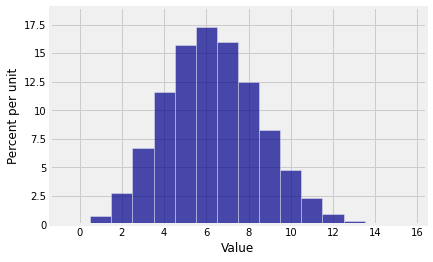

In [101]:
dist_S3 = Table().values(np.arange(16)).probabilities(probs_S3)
Plot(dist_S3)

In [102]:
def dist_sum(n, probs_0_through_N):
    """Return the distribution of S_n,
    the sum of n i.i.d. copies
    of a random variable with distribution probs_0_through_N
    on the integers 0, 1, 2, ..., N"""
    
    # Find the possible values of S_n
    N = len(probs_0_through_N) - 1   
    values_Sn = np.arange(n*N + 1)
    
    # Find the probabilities of those values
    coeffs_X1 = np.flipud(probs_0_through_N)
    pgf_X1 = np.poly1d(coeffs_X1)
    pgf_Sn = pgf_X1**n
    coeffs_Sn = pgf_Sn.c
    probs_Sn = np.flipud(coeffs_Sn)
    
    return Table().values(values_Sn).probabilities(probs_Sn)

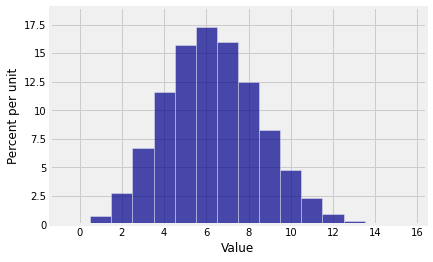

In [103]:
Plot(dist_sum(3, probs_X1))

In [104]:
die = np.append(0, (1/6)*np.ones(6))

In [105]:
die

array([0.        , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667])

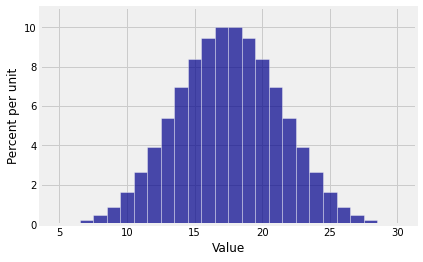

In [107]:
Plot(dist_sum(5, die))

In [108]:
probs_X1 = make_array(0, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 1/3)

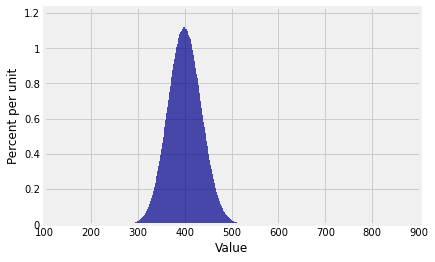

In [113]:
Plot(dist_sum(100, probs_X1))

In [ ]:
#Plot(dist_sum(..., probs_X1))

### Normal Curve with "Mean" $\mu$ and "SD" $\sigma$###
- $\mu$: location parameter
- $\sigma$: scale parameter

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}, ~~~ -\infty < x < \infty
$$

In [ ]:
Plot_norm((-4, 4), 0, 1)
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.xticks(np.arange(-4, 4.1), ['','','$\mu-2\sigma$', '$\mu - \sigma$', '$\mu$', '$\mu+\sigma$','$\mu+2\sigma$',''])
plt.title('Normal Curve, mean $\mu$, SD $\sigma$');

#### Standard Normal Curve ####
$$
\phi(z) ~ = ~ \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z^2}, ~~~ -\infty < z < \infty
$$

In [ ]:
Plot_norm((-4, 4), 0, 1)
plt.xlabel('$z$')
plt.ylabel('$\phi(z)$', rotation=0)
plt.title('Standard Normal Curve');

- Symmetric about 0
- Points of inflection at -1 and +1
- Total area under the curve = 1
- Area between -1 and 1: approx 68%
- Area between -2 and 2: approx 95%
- Area between -3 and 3: approx 99.73%

In [ ]:
Plot_norm([-4, 4], 0, 1, right_end=1)

In [ ]:
stats.norm.cdf(1, 0, 1)

In [ ]:
k1 = np.arange(25, 76)
probs1 = stats.binom.pmf(k1, 100, 0.5)
binom_fair = Table().values(k1).probabilities(probs1)
Plot(binom_fair)
plt.title('Binomial (100, 0.5)');

In [ ]:
Plot(binom_fair)
Plot_norm((25, 75), 50, 5, color='red')
plt.xticks(np.arange(25, 76, 5))
plt.title('Binomial (100, 0.5) and its Normal Approximation');

In [ ]:
k2 = np.arange(0, 11)
probs2 = stats.binom.pmf(k2, 100, 0.01)
binom_biased = Table().values(k2).probabilities(probs2)
Plot(binom_biased)
plt.title('Binomial (100, 0.01)');

In [ ]:
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.xticks(np.arange(-4, 4.1),['','','','$\mu - \sigma/\sqrt{n}$', '$\mu$', '$\mu+\sigma/\sqrt{n}$','',''])
plt.title('Approximate Distribution of Sample Mean');

In [ ]:
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, left_end=-1.28, right_end=1.28)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.xticks(make_array(-1.28, 0, 1.28),['$-z$', '0', '$z$'])
plt.title('Shaded Area: Approximately 80%');

In [ ]:
z_CI_80 = stats.norm.ppf(.9)
z_CI_80

In [ ]:
stats.norm.cdf(z_CI_80)

In [ ]:
stats.norm.cdf(-z_CI_80)

In [ ]:
births = Table.read_table('births.csv')

In [ ]:
births

In [ ]:
n = births.num_rows
n

In [ ]:
sampled_ages = births.column('Maternal Age')

In [ ]:
samp_mean = np.mean(sampled_ages)
samp_mean

In [ ]:
sigma_estimate = np.std(sampled_ages)
sigma_estimate

In [ ]:
# Approx 80% CI for population mean

samp_mean - z_CI_80*sigma_estimate/(n**0.5), samp_mean + z_CI_80*sigma_estimate/(n**0.5)

In [ ]:
def one_resampled_mean():
    return np.average(births.sample().column('Maternal Age'))

In [ ]:
means = make_array()

for i in np.arange(2000):
    means = np.append(means, one_resampled_mean())

In [ ]:
left = percentile(10, means)
right = percentile(90, means)

In [ ]:
resampled_means = Table().with_column(
    'Bootstrap Sample Mean', means
    )
resampled_means.hist(bins=15)
print('Approximate 80% confidence interval for population mean:')
print(np.round(left, 2), 'to', np.round(right, 2))
plt.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);

In [ ]:
births.hist('Maternal Age')

In [ ]:
np.std(sampled_ages)

In [ ]:
np.std(sampled_ages)/(1174**0.5), np.std(means)